**Part 2. AI Agent 활용 프로젝트**

- Chapter 02. 컨텍스트 품질을 보장하는 RAG

    - **📒[실습]** Clip 01. ChromaDB로 만드는 기본 RAG🗒️

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

## 🗄️ 벡터 데이터베이스 저장하기 (ChromaDB)

### Semantic Chunking

https://spri.kr/posts?code=AI-Brief

In [2]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

file_path = "SPRi AI Brief_4월호_산업동향_250407_F.pdf"

loader = PyPDFLoader(file_path)
pages = []

async for page in loader.alazy_load():
    pages.append(page)

text_splitter = SemanticChunker(OpenAIEmbeddings())

docs = text_splitter.split_documents(pages)

In [3]:
print(f"총 {len(docs)}개 만큼의 문서로 청킹되었습니다.")
print([len(i.page_content) for i in docs])

# 각 청크의 메타데이터 및 내용 출력
for i in docs:
    print(i.metadata)       # 문서의 메타데이터 출력 (예: 페이지 번호 등)
    print(i.page_content)   # 분할된 청크의 내용 출력
    print("-" * 100)        # 구분선 출력

총 35개 만큼의 문서로 청킹되었습니다.
[24, 984, 20, 1627, 1504, 1700, 1714, 32, 20, 1332, 1761, 72, 1853, 1568, 1722, 1807, 78, 1714, 1083, 20, 1597, 1707, 1740, 1683, 91, 1747, 20, 1674, 10, 1496, 1723, 58, 1673, 2632, 232]
{'producer': 'Hancom PDF 1.3.0.505', 'creator': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'author': 'dj', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'source': 'SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29, 'page': 0, 'page_label': '1'}
2025년
4월호
인공지능 산업의 최신 동향
----------------------------------------------------------------------------------------------------
{'producer': 'Hancom PDF 1.3.0.505', 'creator': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'author': 'dj', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'source': 'SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29, 'page': 1, 'page_label': '2'}
SPRi AI Brief 2025 년 4월호
2
CONTENTS
정책･법제∙2025 년 중국 양회의 정부 업무보고 , AI 플러스 행동의 지속 

### ChromaDB Vector Retriever

`from_documents`

- `documents (List[Document])`: 벡터 저장소에 추가할 문서 리스트

- `embedding (Optional[Embeddings])`: 임베딩 함수. 기본값은 None

- `ids (Optional[List[str]])`: 문서 ID 리스트. 기본값은 None

- `collection_name (str)`: 생성할 컬렉션 이름.

- `persist_directory (Optional[str])`: 컬렉션을 저장할 디렉토리. 기본값은 None

- `client_settings (Optional[chromadb.config.Settings])`: Chroma 클라이언트 설정

- `client (Optional[chromadb.Client])`: Chroma 클라이언트 인스턴스

- `collection_metadata (Optional[Dict])`: 컬렉션 구성 정보. 기본값은 None

In [4]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=docs, embedding=OpenAIEmbeddings())

In [5]:
# query = "카나나의 테크니컬 리포트는 어떤 내용인가요?"
# query = "에이전트 SDK는 어떤 기능을 제공하나요?"
query = "딥마인드가 발표한 로봇AI 모델은?"

In [6]:
results = vectorstore.similarity_search(query, k=1)

In [7]:
print(results[0].page_content)

SPRi AI Brief 2025 년 4월호
16구글 딥마인드 , 로봇 특화 AI 모델 ‘제미나이 로보틱스 ’ 개발
n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 
동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스 ’를 공개
n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 
즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스 -ER’도 공개KEY Contents
£‘제미나이 로보틱스 ’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유
n구글 딥마인드 (Google Deepmind) 가 2025 년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 
로보틱스 (Gemini Robotics)’ 를 공개
∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로 , 로봇을 직접 
제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며 , 학습 과정에서 접하지 못한 새로운 물체나 
환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유
* Vision-Language-Action: 시각, 언어, 행동을 통합적으로 이해하고 처리하는 AI 모델
∙구글 딥마인드는 종합적인 범용성 벤치마크에서 제미나이 로보틱스가 다른 첨단 시각-언어-행동 
모델보다 평균 두 배 이상의 성능 향상을 보였다고 보고*
n구글 딥마인드에 따르면 제미나이 로보틱스는 제미나이의 언어 이해 능력을 바탕으로 일상적 대화체의  
명령을 이해하고 다양한 언어로 답변할 수 있으며 , 복잡한 다단계 작업도 수행 가능
∙주변 환경을 지속적으로 모니터링하여 환경이나 명령의 변화를 감지하고 즉시 행동을 수정할 수 있어, 
다양한 환경에서 로봇과 협력할 수 있도록 지원
∙종이접기처럼 섬세한 운동 능력과 정밀한 조작을 요구하는 작업을 수행할 수 있으며 , 로봇 유형별로 쉽게 
적응할 수 있도록 설계되어 많은 연구실에서 사용되는

retriever 생성!

In [8]:
vector_retriever = vectorstore.as_retriever(search_kwargs={"k": 1})

In [9]:
relevant_doc = vector_retriever.invoke(query)
print(relevant_doc)

[Document(id='2068896b-3238-471d-9acb-03e8661d3a89', metadata={'author': 'dj', 'creationdate': '2025-04-04T07:23:56+09:00', 'creator': 'Hancom PDF 1.3.0.505', 'moddate': '2025-04-04T07:23:56+09:00', 'page': 17, 'page_label': '18', 'pdfversion': '1.4', 'producer': 'Hancom PDF 1.3.0.505', 'source': 'SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29}, page_content='SPRi AI Brief 2025 년 4월호\n16구글 딥마인드 , 로봇 특화 AI 모델 ‘제미나이 로보틱스 ’ 개발\nn구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 \n동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스 ’를 공개\nn구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 \n즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스 -ER’도 공개KEY Contents\n£‘제미나이 로보틱스 ’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유\nn구글 딥마인드 (Google Deepmind) 가 2025 년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 \n로보틱스 (Gemini Robotics)’ 를 공개\n∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로 , 로봇을 직접 \n제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며 , 학습 과정에서 접하지 못한 새로운 물체나 \n환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유\n* Vision-Language-Action: 시각, 언어, 행동을

In [12]:
print(relevant_doc[0].page_content)

SPRi AI Brief 2025 년 4월호
16구글 딥마인드 , 로봇 특화 AI 모델 ‘제미나이 로보틱스 ’ 개발
n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 
동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스 ’를 공개
n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 
즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스 -ER’도 공개KEY Contents
£‘제미나이 로보틱스 ’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유
n구글 딥마인드 (Google Deepmind) 가 2025 년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 
로보틱스 (Gemini Robotics)’ 를 공개
∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로 , 로봇을 직접 
제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며 , 학습 과정에서 접하지 못한 새로운 물체나 
환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유
* Vision-Language-Action: 시각, 언어, 행동을 통합적으로 이해하고 처리하는 AI 모델
∙구글 딥마인드는 종합적인 범용성 벤치마크에서 제미나이 로보틱스가 다른 첨단 시각-언어-행동 
모델보다 평균 두 배 이상의 성능 향상을 보였다고 보고*
n구글 딥마인드에 따르면 제미나이 로보틱스는 제미나이의 언어 이해 능력을 바탕으로 일상적 대화체의  
명령을 이해하고 다양한 언어로 답변할 수 있으며 , 복잡한 다단계 작업도 수행 가능
∙주변 환경을 지속적으로 모니터링하여 환경이나 명령의 변화를 감지하고 즉시 행동을 수정할 수 있어, 
다양한 환경에서 로봇과 협력할 수 있도록 지원
∙종이접기처럼 섬세한 운동 능력과 정밀한 조작을 요구하는 작업을 수행할 수 있으며 , 로봇 유형별로 쉽게 
적응할 수 있도록 설계되어 많은 연구실에서 사용되는

### EnsembleRetriever

`BM25` 

- BM25는 TF-IDF(Term Frequency-Inverse Document Frequency) 모델을 개선한 것으로, 문서 내 특정 단어의 빈도수와 문서집합 전체에서 그 단어가 얼마나 일반적인지를 고려하여 문서의 관련성을 계산

In [13]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

# pip install rank_bm25
bm25_retriever = BM25Retriever.from_documents(
    docs,
)
bm25_retriever.k = 1

In [14]:
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, vector_retriever],
    weights=[0.7, 0.3],
)

In [15]:
query = "깊이 업스케일링 (Depth UP-Scaling)"

In [16]:
ensemble_result = ensemble_retriever.invoke(query)
bm25_result = bm25_retriever.invoke(query)
vector_result = vector_retriever.invoke(query)

print("[Ensemble Retriever]")
for doc in ensemble_result:
    print(f"Content: {doc.page_content}")
    print()

print("[BM25 Retriever]")
for doc in bm25_result:
    print(f"Content: {doc.page_content}")
    print()

print("[Vector Retriever]")
for doc in vector_result:
    print(f"Content: {doc.page_content}")
    print()


[Ensemble Retriever]
Content: SPRi AI Brief 2025 년 4월호
20카카오 , 자체 개발 AI 모델 ‘카나나 ’의 테크니컬 리포트 공개
n카카오가 자체 개발 LLM ‘카나나 ’의 테크니컬 리포트를 공개하고 , 카나나에 단계별 사전학습과 
가지치기 , 지식증류 등의 학습 기법을 적용해 학습 효율성을 극대화했다고 설명  
n카카오는 연구 목적의 활용을 지원하기 위해 온디바이스 환경에서 작동될 수 있는 경량 모델 
‘카나나 나노 2.1B’ 를 오픈소스로 공개KEY Contents
£카나나 , 단계별 사전학습과 지식 증류 등의 학습 기법으로 학습 효율성 극대화
n카카오가 2025년 2월 27일 자체 개발 언어모델 ‘카나나 (Kanana)’ 의 구조와 학습 과정, 성능을 상세히 
다룬 테크니컬 리포트 *를 공개
* Kanana: Compute-efficient Bilingual Language Models(https://arxiv.org/html/2502.18934v3/)
∙카카오는 2024 년 10월 개발자 컨퍼런스 ‘if(kakaoAI)2024’ 에서 카나나 언어모델 라인업 (카나나 플래그 , 
에센스 , 나노)을 처음 공개했으며 , 2024 년 말 카나나 플래그의 개발을 완료해 전체 라인업을 구축
∙카카오에 따르면 카나나 플래그는 글로벌 최고 수준의 한국어 ·영어 성능을 보였으며 , 특히 한국어 지식을 
평가하는 벤치마크 KMMLU 에서는 경쟁 모델을 압도하는 한국어 처리 성능을 달성*
* Kanana Flag 32.5B: 64.19, Qwen2.5B 32B: 59.37, Gemma2 27B: 49.98, EXAONE-3.5-32B: 55.44
n카카오는 카나나의 학습 효율을 극대화하기 위해 단계별 사전학습 (Staged Pre-training), 가지치기
(Pruning)*, 지식 증류(Distillation)** 와 같은 다양한 학습 기법을 적용했다고 설명
*모델 구성 요소를 가지치기해 중요 요소만 남기는 기법  **큰 모델의

## 👉 RAG 파이프라인 구성하기 (Graph)

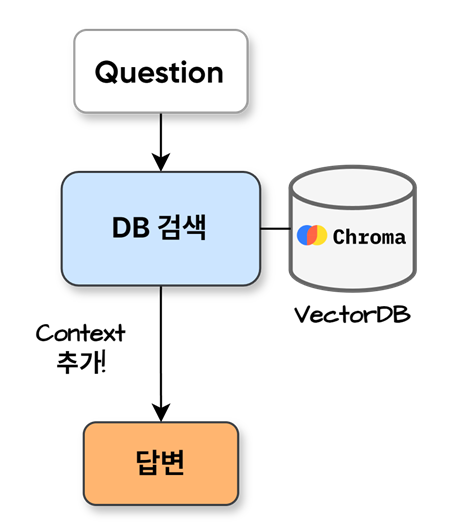

In [17]:
from langgraph.graph import StateGraph, MessagesState


class State(MessagesState):
    context: str

graph_builder = StateGraph(State)

In [18]:
from langchain_core.messages import HumanMessage

def retriever(state: State):
    """
    Retrieve the relevant document and return the content.
    """
    print("##### RETRIEVER #####")
    query = state["messages"][0].content
    ensemble_result = ensemble_retriever.invoke(query)

    content = ensemble_result[0].page_content
    print("[CONTEXT]\n", content)

    return {"context" : content, "messages": [HumanMessage(content=content)]}

In [22]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain import hub

llm = ChatOpenAI(model="gpt-4o", temperature=0)

def answer(state: State):
    """
    Answer the question based on the retrieved document.
    """
    print("##### ANSWER #####")
    query = state["messages"][0].content
    context = state["messages"][-1].content
    # context = state["context"]

    # prompt = ChatPromptTemplate.from_messages(
    #     [
    #         ("system", 
    #          """
    #             You are an assistant for answering questions based on retrieved document context.
    #             Answer in Korean.

    #             Context: {context}"""
    #          ),
    #         ("human", "{question}"),
    #     ]
    # )
    prompt = hub.pull("rlm/rag-prompt")
    # You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
    # Question: {question} 
    # Context: {context} 
    # Answer:

    response = llm.invoke(
        prompt.format_messages(context=context, question=query)
    )

    return {"messages": [response]}


In [21]:
hub.pull("rlm/rag-prompt").pretty_print()

c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\langsmith\client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [23]:
from langgraph.graph import START, END

graph_builder.add_sequence([retriever, answer])
graph_builder.add_edge(START, "retriever")
graph_builder.add_edge("answer", END)
graph = graph_builder.compile()

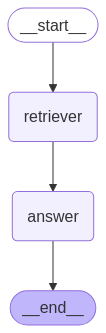

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [24]:
response = graph.invoke({"messages": "카나나의 테크니컬 리포트는 어떤 내용인가요?"})

for mes in response['messages']:
    mes.pretty_print()

##### RETRIEVER #####
[CONTEXT]
 SPRi AI Brief 2025 년 4월호
20카카오 , 자체 개발 AI 모델 ‘카나나 ’의 테크니컬 리포트 공개
n카카오가 자체 개발 LLM ‘카나나 ’의 테크니컬 리포트를 공개하고 , 카나나에 단계별 사전학습과 
가지치기 , 지식증류 등의 학습 기법을 적용해 학습 효율성을 극대화했다고 설명  
n카카오는 연구 목적의 활용을 지원하기 위해 온디바이스 환경에서 작동될 수 있는 경량 모델 
‘카나나 나노 2.1B’ 를 오픈소스로 공개KEY Contents
£카나나 , 단계별 사전학습과 지식 증류 등의 학습 기법으로 학습 효율성 극대화
n카카오가 2025년 2월 27일 자체 개발 언어모델 ‘카나나 (Kanana)’ 의 구조와 학습 과정, 성능을 상세히 
다룬 테크니컬 리포트 *를 공개
* Kanana: Compute-efficient Bilingual Language Models(https://arxiv.org/html/2502.18934v3/)
∙카카오는 2024 년 10월 개발자 컨퍼런스 ‘if(kakaoAI)2024’ 에서 카나나 언어모델 라인업 (카나나 플래그 , 
에센스 , 나노)을 처음 공개했으며 , 2024 년 말 카나나 플래그의 개발을 완료해 전체 라인업을 구축
∙카카오에 따르면 카나나 플래그는 글로벌 최고 수준의 한국어 ·영어 성능을 보였으며 , 특히 한국어 지식을 
평가하는 벤치마크 KMMLU 에서는 경쟁 모델을 압도하는 한국어 처리 성능을 달성*
* Kanana Flag 32.5B: 64.19, Qwen2.5B 32B: 59.37, Gemma2 27B: 49.98, EXAONE-3.5-32B: 55.44
n카카오는 카나나의 학습 효율을 극대화하기 위해 단계별 사전학습 (Staged Pre-training), 가지치기
(Pruning)*, 지식 증류(Distillation)** 와 같은 다양한 학습 기법을 적용했다고 설명
*모델 구성 요소를 가지치기해 중요 요소만 남기는 기법  **큰 

c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\langsmith\client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


================================ Human Message =================================

카나나의 테크니컬 리포트는 어떤 내용인가요?
================================ Human Message =================================

SPRi AI Brief 2025 년 4월호
20카카오 , 자체 개발 AI 모델 ‘카나나 ’의 테크니컬 리포트 공개
n카카오가 자체 개발 LLM ‘카나나 ’의 테크니컬 리포트를 공개하고 , 카나나에 단계별 사전학습과 
가지치기 , 지식증류 등의 학습 기법을 적용해 학습 효율성을 극대화했다고 설명  
n카카오는 연구 목적의 활용을 지원하기 위해 온디바이스 환경에서 작동될 수 있는 경량 모델 
‘카나나 나노 2.1B’ 를 오픈소스로 공개KEY Contents
£카나나 , 단계별 사전학습과 지식 증류 등의 학습 기법으로 학습 효율성 극대화
n카카오가 2025년 2월 27일 자체 개발 언어모델 ‘카나나 (Kanana)’ 의 구조와 학습 과정, 성능을 상세히 
다룬 테크니컬 리포트 *를 공개
* Kanana: Compute-efficient Bilingual Language Models(https://arxiv.org/html/2502.18934v3/)
∙카카오는 2024 년 10월 개발자 컨퍼런스 ‘if(kakaoAI)2024’ 에서 카나나 언어모델 라인업 (카나나 플래그 , 
에센스 , 나노)을 처음 공개했으며 , 2024 년 말 카나나 플래그의 개발을 완료해 전체 라인업을 구축
∙카카오에 따르면 카나나 플래그는 글로벌 최고 수준의 한국어 ·영어 성능을 보였으며 , 특히 한국어 지식을 
평가하는 벤치마크 KMMLU 에서는 경쟁 모델을 압도하는 한국어 처리 성능을 달성*
* Kanana Flag 32.5B: 64.19, Qwen2.5B 32B: 59.37, Gemma2 27B: 49.98, EXAONE-3.5-32B: 55.44
n카카

## Langchain Retrieval Tool 

`create_retriever_tool` : Retriever를 Tool로 정의하여, 사용자 질의에 필요한 Retrieval를 진행

In [31]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    ensemble_retriever,
    "retrieve_AI_brief",
    "Search and return information about AI Technology and Industry.",
)

tools = [retriever_tool]

In [32]:
from langgraph.graph import StateGraph, MessagesState

graph_builder = StateGraph(MessagesState)

In [33]:
from langgraph.prebuilt import ToolNode, tools_condition

tool_node = ToolNode(tools=tools)
graph_builder.add_node("retriever", tool_node)

In [34]:
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # 1) 도구 호출(tool_calls) 2) AI Message

graph_builder.add_node("chatbot", chatbot)

`tools_condition` : 마지막 메시지("messages")에 도구 호출(tool_calls)이 있는 경우 ToolNode로 라우팅, else END

In [35]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    {
        "tools" : "retriever", 
        END: END
    }
)
graph_builder.add_node("answer", answer)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("retriever", "answer")
graph_builder.add_edge("answer", END)
graph = graph_builder.compile()

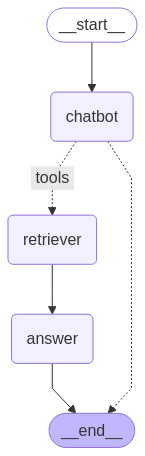

In [ ]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [36]:
response = graph.invoke({"messages": "카나나의 테크니컬 리포트는 어떤 내용인가요?"})

for mes in response['messages']:
    mes.pretty_print()

##### ANSWER #####


c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\.conda\Lib\site-packages\langsmith\client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


================================ Human Message =================================

카나나의 테크니컬 리포트는 어떤 내용인가요?
================================== Ai Message ==================================
Tool Calls:
  retrieve_AI_brief (call_cQF5nkf7svqBbg5zm62OQdhQ)
 Call ID: call_cQF5nkf7svqBbg5zm62OQdhQ
  Args:
    query: 카나나 테크니컬 리포트
================================= Tool Message =================================
Name: retrieve_AI_brief

SPRi AI Brief 2025 년 4월호
20카카오 , 자체 개발 AI 모델 ‘카나나 ’의 테크니컬 리포트 공개
n카카오가 자체 개발 LLM ‘카나나 ’의 테크니컬 리포트를 공개하고 , 카나나에 단계별 사전학습과 
가지치기 , 지식증류 등의 학습 기법을 적용해 학습 효율성을 극대화했다고 설명  
n카카오는 연구 목적의 활용을 지원하기 위해 온디바이스 환경에서 작동될 수 있는 경량 모델 
‘카나나 나노 2.1B’ 를 오픈소스로 공개KEY Contents
£카나나 , 단계별 사전학습과 지식 증류 등의 학습 기법으로 학습 효율성 극대화
n카카오가 2025년 2월 27일 자체 개발 언어모델 ‘카나나 (Kanana)’ 의 구조와 학습 과정, 성능을 상세히 
다룬 테크니컬 리포트 *를 공개
* Kanana: Compute-efficient Bilingual Language Models(https://arxiv.org/html/2502.18934v3/)
∙카카오는 2024 년 10월 개발자 컨퍼런스 ‘if(kakaoAI)2024’ 에서 카나나 언어모델 라인업 (카나나 플래그 , 
에센스 , 나노)을 처음 공개했으며

In [37]:
for chunk in graph.stream({"messages": "안녕하세요."}):
    for node, value in chunk.items():
        if node:
            print("=====", node, "=====")
        if "messages" in value:
            print(value['messages'][0].content)

===== chatbot =====
안녕하세요! 어떻게 도와드릴까요?
